In [121]:
# Python 3 
# AdaBoost
# Done by: 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

Importing lib

In [122]:
video=pd.read_csv('JPvideos.csv',encoding='latin1')
video.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,1,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...


In [123]:
video.describe(include="all")

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
count,20523,20523,20523,20523,20523.000000,20523,20523,2.052300e+04,2.052300e+04,20523.000000,20523.000000,20523,20523,20523,20523,18399
unique,12912,122,13087,4649,NaN,12505,8761,NaN,NaN,NaN,NaN,13093,2,2,2,10743
top,#NAME?,18.04.05,ãå¹ãããè² ããè©±é¡ã®é¢ç½ãç»å...,DHCãã¬ã,NaN,2018-02-06T08:00:01.000Z,[none],NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,False,False,False,èª¬æ
freq,282,199,17,169,NaN,12,3200,NaN,NaN,NaN,NaN,8,19109,19133,20511,94
mean,NaN,NaN,NaN,NaN,19.807533,NaN,NaN,2.620215e+05,8.059587e+03,366.823613,1196.077864,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,6.655895,NaN,NaN,1.294938e+06,8.384837e+04,2658.598540,14943.608305,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,7.980000e+02,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,1.710000e+04,1.210000e+02,9.000000,19.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,6.408400e+04,6.480000e+02,43.000000,133.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.833670e+05,2.303000e+03,178.000000,488.000000,NaN,NaN,NaN,NaN,NaN


In [124]:
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20523 entries, 0 to 20522
Data columns (total 16 columns):
video_id                  20523 non-null object
trending_date             20523 non-null object
title                     20523 non-null object
channel_title             20523 non-null object
category_id               20523 non-null int64
publish_time              20523 non-null object
tags                      20523 non-null object
views                     20523 non-null int64
likes                     20523 non-null int64
dislikes                  20523 non-null int64
comment_count             20523 non-null int64
thumbnail_link            20523 non-null object
comments_disabled         20523 non-null bool
ratings_disabled          20523 non-null bool
video_error_or_removed    20523 non-null bool
description               18399 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 2.1+ MB


In [125]:
print(video.columns)
print(video.dtypes)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


In [126]:
video['category_id'].value_counts()

24    6259
22    3915
17    2037
25    1392
10    1290
1     1220
15    1127
20    1030
26     799
23     743
2      280
28     158
19     143
27     112
29      18
Name: category_id, dtype: int64

In [127]:
video.shape

(20523, 16)

In [128]:
video["pred_views"]=video['views']

video.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,pred_views
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...,188085
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN,90929
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN,6408303
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,96255
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,1,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...,108408


In [129]:
video.drop(['views'], axis=1, inplace=True)


In [130]:
video.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,pred_views
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...,188085
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN,90929
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN,6408303
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,96255
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,1,2018-02-06T02:30:00.000Z,[none],1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...,108408


In [131]:
video['publish_time'] = pd.to_datetime(video['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [132]:
video.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2124
pred_views                   0
dtype: int64

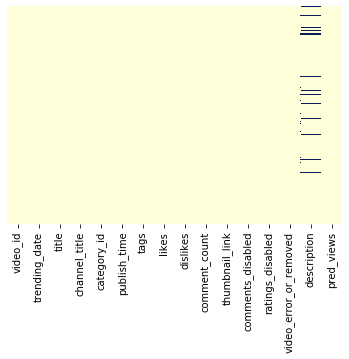

In [133]:
sns.heatmap(video.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [134]:
video=video.dropna()

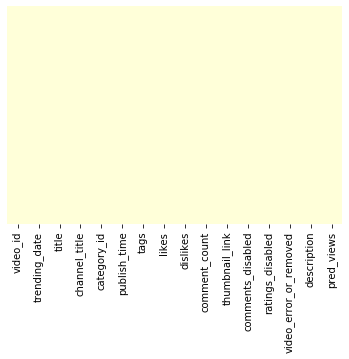

In [135]:
sns.heatmap(video.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [136]:
selected=['pred_views','likes','dislikes','title']
video[selected].sample(5)

,pred_views,likes,dislikes,title
1752,231262,0,0,"Bhadragol, 16th February 2018, Full Episode 159"
2448,4487,50,4,2018å¹´2æ21æ¥ ãã¯ããå¯ºã¡ããæ´»å...
18338,151849,1930,203,"WANTED SA RADYO FULL EPISODE | May 31, 2018"
13115,622583,1295,12591,[Tik Tok]ããã¯ãã°ããæ¶ãããã¾ã...
351,140080,3827,100,å ¬éèµ°è¡å¯ã®ã«ã¼ããä½ã part3 ã...


In [137]:
video[['pred_views','likes','dislikes','comment_count']].head()

,pred_views,likes,dislikes,comment_count
0,188085,591,189,0
3,96255,1165,277,545
4,108408,1336,74,201
5,193593,0,0,53
7,66272,51,167,164


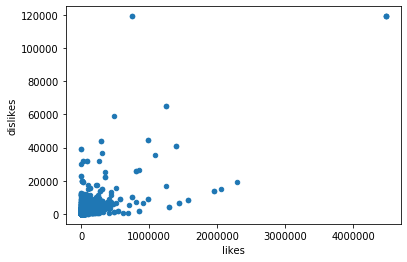

In [138]:

ax1 = video.plot.scatter(x='likes',y='dislikes')

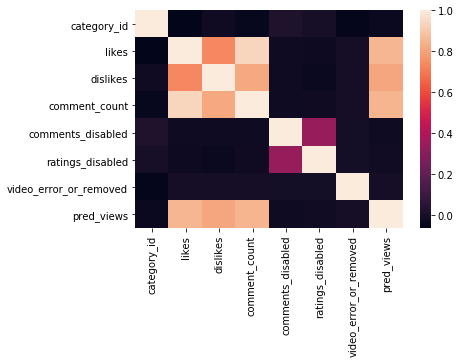

In [139]:
corr = video.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [140]:
publish_year = []
d = {}
cnt = 0
for i in video['publish_time']:
    publish_year.append(i.year)

video['publish_year'] = publish_year

,likes,dislikes,pred_views,comment_count
publish_year,,,,
2015,56.000000,0.000000,6965.000000,9.000000
2017,15.000000,0.000000,6012.000000,4.000000
2018,8810.319037,389.578441,275190.591705,1300.471352


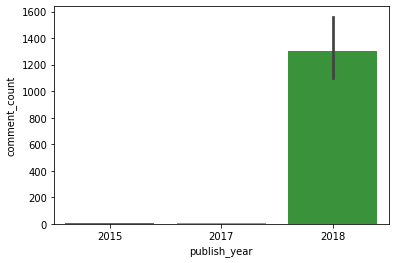

In [141]:
sns.barplot(x=video["publish_year"],y=video["comment_count"])
video.groupby("publish_year")["likes","dislikes","pred_views","comment_count"].mean()


In [142]:
trending_month = []
m = {}
cntr = 0
for i in video['publish_time']:
    trending_month.append(i.month)

video['trending_month'] = trending_month

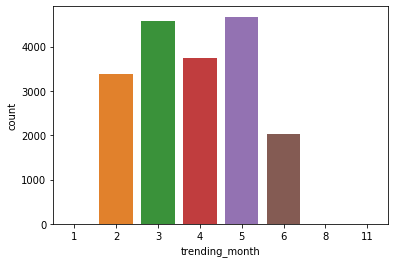

In [143]:
sns.countplot(x=video["trending_month"],data=video)

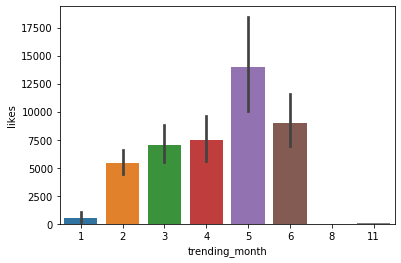

In [144]:
sns.barplot(x=video["trending_month"],y=video["likes"])

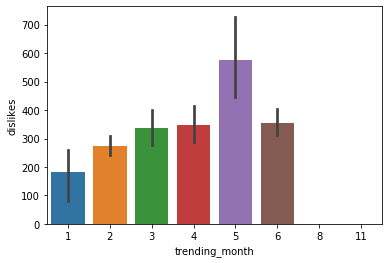

In [145]:
sns.barplot(x=video["trending_month"],y=video["dislikes"])

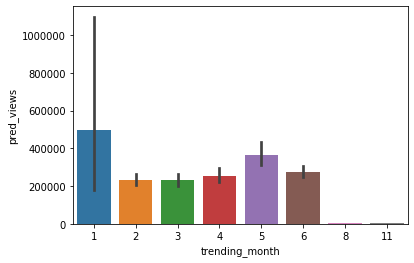

In [146]:
sns.barplot(x=video["trending_month"],y=video["pred_views"])

,likes,dislikes,pred_views,comment_count
trending_month,,,,
1,483.000000,184.000000,497363.333333,73.666667
2,5412.916026,273.522472,230027.716144,739.786221
3,7055.923295,337.098776,230118.539336,1003.864729
4,7455.498127,346.598716,256154.761102,943.692081
5,13975.667807,574.420749,366703.540535,2269.982674
6,9037.534125,354.853116,276010.046489,1329.336301
8,15.000000,0.000000,6012.000000,4.000000
11,56.000000,0.000000,6965.000000,9.000000


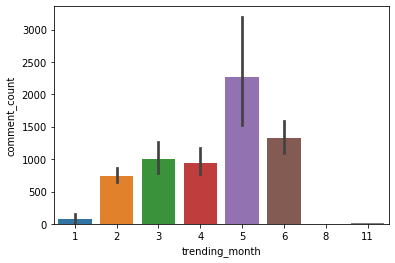

In [147]:
sns.barplot(x=video["trending_month"],y=video["comment_count"])
video.groupby("trending_month")["likes","dislikes","pred_views","comment_count"].mean()

In [148]:
print(video["title"].value_counts())


ãå¹ãããè² ããè©±é¡ã®é¢ç½ãç»åé                                                                                                                                                                                             17
ãªã¯ã¨ã¹ããå³èã§å¼¾ãèªãã¾ãï¼ï¼ï¼                                                                                                                                                                                          14
è¥¿åç§æ¨¹ã®è¨å ±ãæ±ååä¹ãäºè¨ãã¦ããäºå®ãçºè¦ï¼ï¼ï¼å¹´åã®éè¦ã§è¦ããåå®¹ã¨ã¯ï¼                                                                                                                      8
é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ãæ®å½±                                                                                                                                                                                           8
ãæå¼·ã®é£¯ãã­ãçµ¶å

In [149]:
print(video["channel_title"].value_counts())

DHCãã¬ã                                                                  169
é£ãããã§ãããã                                                   145
é£ãããé£¯                                                               108
MEGWIN TV                                                                      90
ã¯ãããè¿·ä½åå ´                                                       88
MAXé´æ¨ TV                                                                   86
ä»æ¥ã¤ãã¤å¥´ã«ä¼ã£ã                                                 84
æ°´æºããã³ã                                                             82
é£ãããHOUSE                                                              76
Momo and Tenããã¨å¤©                                                       76
ãããã¾ã                                                                75
é£ãããã¯                                                                72
AbemaTVå¬å¼ Yo

In [150]:
print(video["tags"].value_counts())

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  1983
Fishing|"bassfishing"|"é£ã"|"ãã¹é£ã"|"ãã©ãã¯ãã¹"|"ãã©ãã¯ãã¹é£ã"|"ã©ã¤ãã·ã§ã¢ã¸ã®ã³ã°"|"ã·ã§ã¢ã¸ã®ã³ã°"|"ã¸ã®ã³ã°"|"ä½è³ããã§ãã

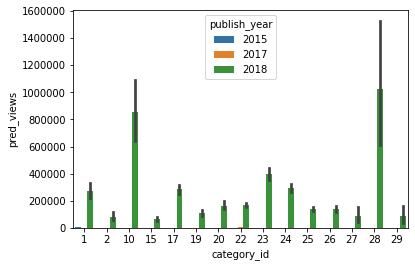

In [151]:
sns.barplot(x=video["category_id"],y=video["pred_views"],data=video,hue="publish_year")

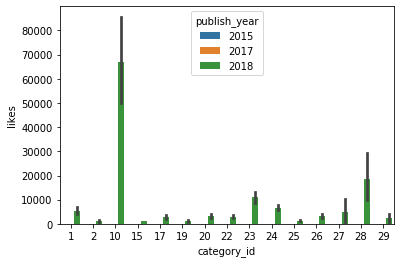

In [152]:
sns.barplot(x=video["category_id"],y=video["likes"],data=video,hue="publish_year")

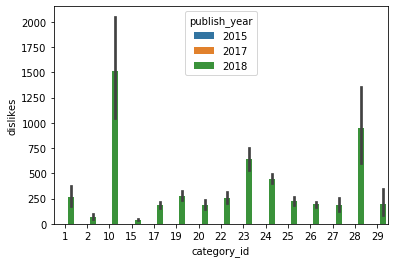

In [153]:
sns.barplot(x=video["category_id"],y=video["dislikes"],data=video, hue="publish_year")

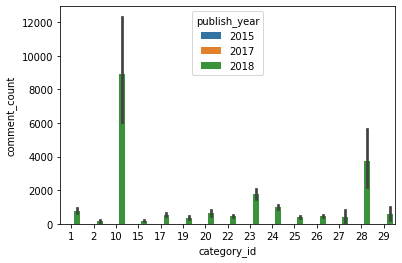

In [154]:
sns.barplot(x=video["category_id"],y=video["comment_count"],data=video,hue="publish_year")

In [155]:
y=np.log(video["pred_views"])
x1=np.log(video["likes"])
x2=np.log(video["dislikes"])
x3=np.log(video["comment_count"])

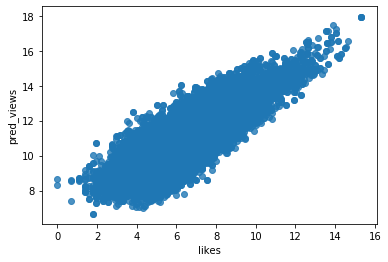

In [156]:
sns.regplot(x=x1,y=y,fit_reg=False)

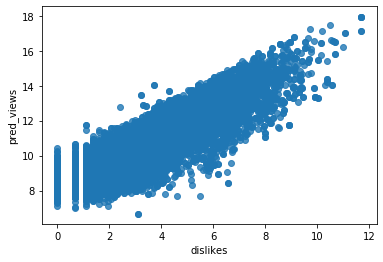

In [157]:
sns.regplot(x=x2,y=y,fit_reg=False)

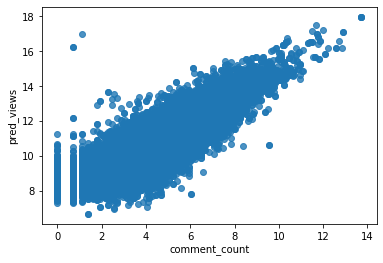

In [158]:
sns.regplot(x=x3,y=y,fit_reg=False)

False    17076
True      1323
Name: comments_disabled, dtype: int64


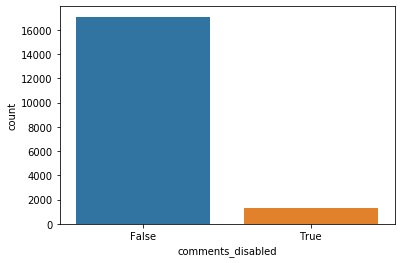

In [159]:
print(video["comments_disabled"].value_counts())
sns.countplot(x="comments_disabled",data=video)

False    17145
True      1254
Name: ratings_disabled, dtype: int64


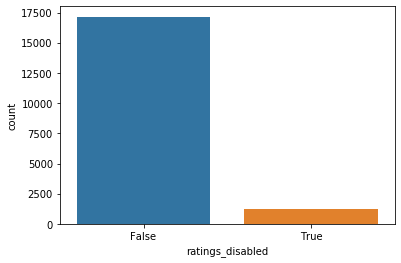

In [160]:
print(video["ratings_disabled"].value_counts())
sns.countplot(x="ratings_disabled",data=video)

False    18387
True        12
Name: video_error_or_removed, dtype: int64


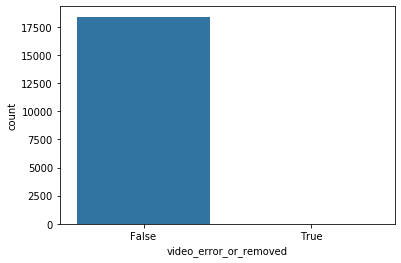

In [161]:
print(video["video_error_or_removed"].value_counts())
sns.countplot(x="video_error_or_removed",data=video)

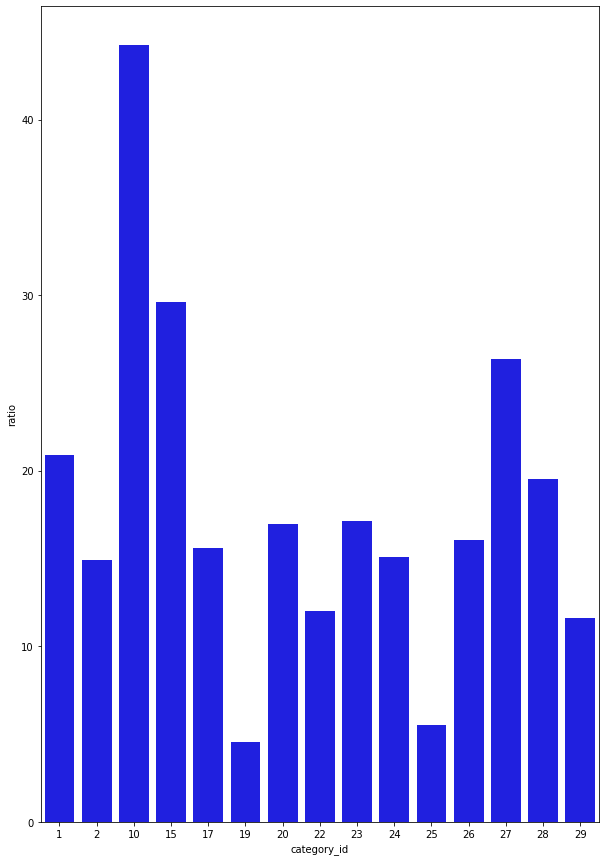

In [162]:
like_dislike_ratio = video.groupby('category_id')['likes'].agg('sum') / video.groupby('category_id')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category_id','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="category_id", y="ratio", data=like_dislike_ratio,
            label="Likes-Dislikes Ratio", color="b")

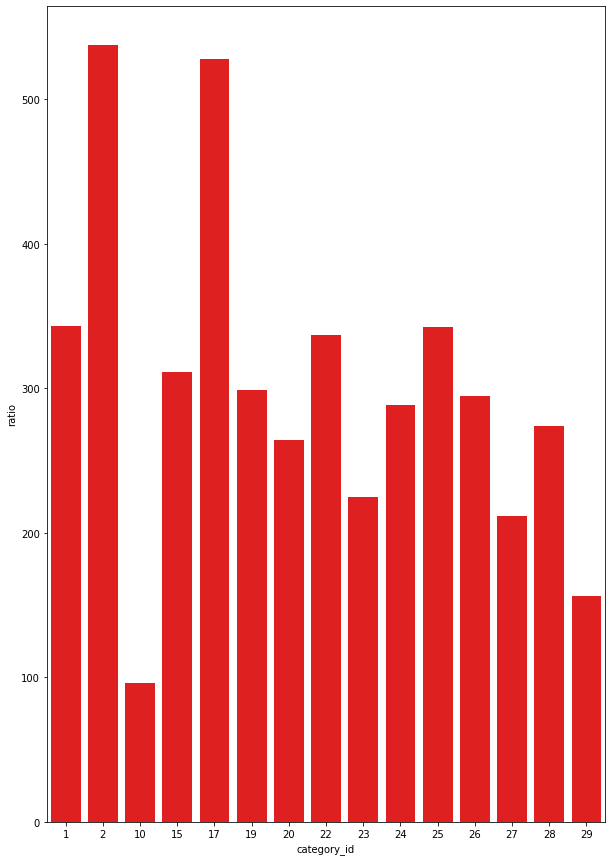

In [163]:
views_comment_ratio = video.groupby('category_id')['pred_views'].agg('sum') / video.groupby('category_id')['comment_count'].agg('sum')
views_comment_ratio = views_comment_ratio.sort_values(ascending=False).reset_index()
views_comment_ratio.columns = ['category_id','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="category_id", y="ratio", data=views_comment_ratio,
            label="Views-Comments Ratio", color="r")

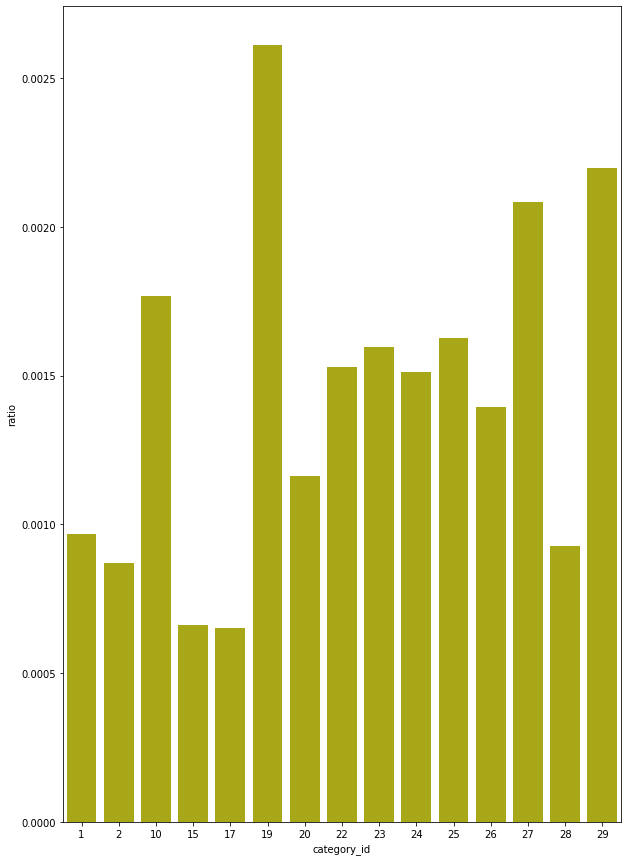

In [164]:
view_dislike_ratio = video.groupby('category_id')['dislikes'].agg('sum') / video.groupby('category_id')['pred_views'].agg('sum')
view_dislike_ratio = view_dislike_ratio.sort_values(ascending=False).reset_index()
view_dislike_ratio.columns = ['category_id','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="category_id", y="ratio", data=view_dislike_ratio,
            label="Views-Dislikes Ratio", color="y")

In [165]:
video.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,pred_views,publish_year,trending_month
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06 03:04:37,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...,188085,2018,2
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06 06:08:49,ã¢ã·ã¿ãã¯ãã¤,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,96255,2018,2
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,1,2018-02-06 02:30:00,[none],1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...,108408,2018,2
5,OIDfjdGERr8,18.07.02,æè³ãã¤ãããã®æ­»å ãå å¤«ã»åç...,æ¿ç½ï¼ï¼ã¹ã¼ãã¼è¸è½ãã£ã³ãã«ï...,22,2018-02-06 03:27:10,"æè³ãã¤ã|""å «æ¨äºå¸å­""|""æ²³éæ¯å­...",0,0,53,https://i.ytimg.com/vi/OIDfjdGERr8/default.jpg,False,True,False,Twitterå§ãã¾ããï¼\n\nç»é²ãããã...,193593,2018,2
7,MPQaySneSUc,18.07.02,ç´æLIVE ã°ããã£! 2018å¹´2æ6æ¥ 180206,ãã¤ã­ã³ã° 2018,23,2018-02-06 07:01:29,[none],51,167,164,https://i.ytimg.com/vi/MPQaySneSUc/default.jpg,False,False,False,ç´æLIVE ã°ããã£! 2018å¹´2æ6æ¥ 180206,66272,2018,2


In [166]:
video.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'pred_views', 'publish_year',
       'trending_month'],
      dtype='object')

In [167]:
video.drop(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'publish_year'], axis=1, inplace=True)

In [168]:

popular = video['pred_views'].mean()
popular

275146.8050981032

In [169]:
first_half = video[video['pred_views']< popular]
len(video), len(first_half)

(18399, 15075)

In [170]:

not_popular = first_half['pred_views'].mean()
not_popular

69774.90951907131

In [171]:
is_popular = []
for view in video['pred_views']:
    if view < not_popular:
      is_popular.append('not_popular')
    elif not_popular < view < popular:
      is_popular.append('popular')
    else:
      is_popular.append('very popular')
video['is_popular'] = is_popular

In [172]:
video.drop(['pred_views' ], axis=1, inplace = True)

In [173]:
video.head()

,category_id,likes,dislikes,comment_count,trending_month,is_popular
0,25,591,189,0,2,popular
3,25,1165,277,545,2,popular
4,1,1336,74,201,2,popular
5,22,0,0,53,2,popular
7,23,51,167,164,2,not_popular


In [174]:
X = video.iloc[:, 0:5]
y = video.iloc[:, 5]

In [175]:
X.shape

(18399, 5)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [177]:
X_train

,category_id,likes,dislikes,comment_count,trending_month
12923,23,3567,140,1072,4
13507,22,3514,379,1426,5
20148,17,6402,497,872,6
4983,22,1007,102,290,3
8422,24,4190,561,805,3
12610,20,0,0,0,4
16978,24,2962,72,18,5
1902,17,370,420,56,2
8484,22,313,26,17,3
7290,24,154,8,29,3


In [178]:
AdaModel = AdaBoostClassifier(n_estimators=100, learning_rate=1)

In [179]:
model = AdaModel.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [180]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7701086956521739
